# Sentiment Analysis of Tweets about Apple and Google Products

## Project Summary

This project aims to analyze the sentiment of tweets related to Apple and Google products using Natural Language Processing (NLP) techniques. The dataset used contains over 9,000 tweets rated by human raters as either positive, negative, or neutral. The goal is to build a model capable of determining the sentiment of a tweet based on its content, which can be used for analyzing public perception of these tech companies.

The project involved the following steps:
- **Data Preparation**: Cleaned the data, removed irrelevant content, and vectorized the text using TF-IDF.
- **Model Building**: A baseline Logistic Regression model was first built for binary classification (positive vs. negative). We then extended it to multiclass classification to include neutral tweets.
- **Advanced Models**: We applied Random Forest (both untuned and tuned) and Neural Network models to improve performance.
- **Model Evaluation**: Various models were evaluated and compared using metrics such as accuracy, precision, recall, and F1-score.

The best-performing model was the Random Forest classifier, which showed high accuracy and balanced precision and recall across all classes. This model provides a practical solution for real-time analysis of tweet sentiments related to Apple and Google products.

In conclusion, this project highlights the effectiveness of different machine learning models in sentiment analysis tasks, with Random Forest proving to be the most suitable for our dataset.


# 1. Business Understanding
#### 1. Objective:

The goal is to build an NLP model that rates the sentiment of a Tweet as positive, negative, or neutral, based on its content. This is useful for companies to understand customer opinions, make decisions, and improve products.


#### 2. Target Audience: 

The sentiment analysis could help marketers, product managers, and customer service teams understand how users feel about products.


#### 3. Success Criteria:

Success is measured by the accuracy and other classification metrics (e.g., F1-score) of the model. An acceptable model should classify sentiments effectively

#### 4.  Key Questions:

~ What is the general sentiment towards Apple and Google products?

~ Are there specific topics that elicit strong positive or negative sentiment?

~ How does the sentiment change over time or in response to product releases

# 2. Data Understanding
Dataset Overview: The file judge-1377884607_tweet_product_company.csv contains over 9,000 Tweets, each rated as positive, negative, or neither by human raters.


#### Initial Exploration:

1. Load the data to examine its structure, key columns, and distribution of the target labels.
2. Check if there are columns related to the content of the Tweet, the date, user information, etc.
3. Analyze the class distribution to identify any imbalance (e.g., are most Tweets neutral?).

In [1]:
import pandas as pd
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')


In [2]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
df.describe

<bound method NDFrame.describe of                                              tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...              

In [5]:
print(df.columns)

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')


In [6]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [7]:
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [8]:
df. tweet_text.value_counts()

RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                           5
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                                           4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                                        4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                                        3
Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                                       2
                                                                                                                                                        ..
Watching the Man U game at the Radisson while waiting for the next tal

# 3. Data Preparation

As stated in the code steps in the cell below.

In [9]:
# 1. Check for Missing Values
# Count of missing values for each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)

# 2. Check for Duplicates
# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# Display duplicate rows if any
if duplicate_rows > 0:
    print("\nDuplicate Rows:\n", df[df.duplicated()])

# 3. Check for Inconsistencies
# Check for data types of each column
print("\nData Types:\n", df.dtypes)

# Identify unique values for categorical columns to spot inconsistencies
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in column '{column}':")
    print(df[column].unique())

# Checking for inconsistent capitalization in categorical data
for column in df.select_dtypes(include=['object']).columns:
    inconsistent_values = df[column].apply(lambda x: x.lower() if isinstance(x, str) else x).unique()
    print(f"\nStandardized unique values in column '{column}':")
    print(inconsistent_values)

Missing Values:
 tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

Percentage of Missing Values:
 tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

Number of Duplicate Rows: 22

Duplicate Rows:
                                              tweet_text  \
468      Before It Even Begins, Apple Wins #SXSW {link}   
776   Google to Launch Major New Social Network Call...   
2232  Marissa Mayer: Google Will Connect the Digital...   
2559  Counting down the days to #sxsw plus strong Ca...   
3950  Really enjoying the changes in Gowalla 3.0 for...   
3962  #SXSW is just starting, #CTIA is around the co...   
4897  Oh. My. God. The #SXSW app for iPad is pure, u...   
5338  RT @mention ÷¼ GO BEYOND BO

#### Understanding Data quality.

In [10]:
# Check for NaNs
nan_count = df.isna().sum()
print("Number of NaNs in each column:")
print(nan_count)

Number of NaNs in each column:
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


### Cleaning each column

In [11]:
# Drop rows where 'tweet_text' is missing
df = df.dropna(subset=['tweet_text'])

# Verify the dataset after dropping missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB
None


In [12]:
import re

# Clean the Tweet text
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing spaces
    return text

# Apply the cleaning function
df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_tweet)

# Display the cleaned Tweet text
df[['tweet_text', 'cleaned_tweet_text']].head()


<ipython-input-12-7c201dfb13b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_tweet)


,tweet_text,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a g iphone after hrs tweeting at it w...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about awesome ipadiphone app that youll...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for also they should sale them ...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri marissa mayer google tim o...


In [13]:
# Remove rows with missing or 'unknown' values in 'emotion_in_tweet_is_directed_at'
df = df[df['emotion_in_tweet_is_directed_at'].notna()]  # Remove NaN values
df = df[df['emotion_in_tweet_is_directed_at'].str.lower() != 'unknown']  # Remove 'unknown'

# Standardize the text in 'emotion_in_tweet_is_directed_at'
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].str.lower().str.strip()

# Display the cleaned 'emotion_in_tweet_is_directed_at' column
df[['emotion_in_tweet_is_directed_at']].drop_duplicates().head(10)


,emotion_in_tweet_is_directed_at
0,iphone
1,ipad or iphone app
2,ipad
4,google
7,android
9,apple
11,android app
13,other google product or service
703,other apple product or service


In [14]:
# Convert values in 'is_there_an_emotion_directed_at_a_brand_or_product' to lowercase and fix inconsistencies
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.lower()
df.is_there_an_emotion_directed_at_a_brand_or_product


0       negative emotion
1       positive emotion
2       positive emotion
3       negative emotion
4       positive emotion
              ...       
9077    positive emotion
9079    positive emotion
9080    negative emotion
9085    positive emotion
9088    positive emotion
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 3291, dtype: object

#### Verifying the changes

In [15]:

# Verify unique values after standardization
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].unique())

['negative emotion' 'positive emotion'
 'no emotion toward brand or product' "i can't tell"]


# EDA without Sentiment labels

The goal of performing EDA before engineering the sentiment labels is to better understand the underlying structure of the data and generate insights without being influenced by the target labels. This will allow us to build a more informed model later on

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

Step 1: Word Frequency Analysis
We will calculate the frequency of words used across all Tweets.

In [17]:
# Combine all tweet texts into a single string
all_words = ' '.join(df['tweet_text'].astype(str)).lower()
# Tokenize and count word frequency
word_list = re.findall(r'\b\w+\b', all_words)
word_freq = Counter(word_list)

# Most common words
common_words = word_freq.most_common(20)
print("Most common words:", common_words)

Most common words: [('sxsw', 3468), ('mention', 2278), ('the', 1806), ('to', 1324), ('link', 1210), ('ipad', 1160), ('at', 1088), ('apple', 1013), ('rt', 980), ('for', 962), ('a', 896), ('google', 794), ('i', 760), ('is', 748), ('of', 721), ('in', 710), ('iphone', 659), ('and', 626), ('quot', 596), ('store', 563)]


Step 2: Tweet Length Analysis
We'll create features for the length of each Tweet in terms of characters and words and plot the distribution.

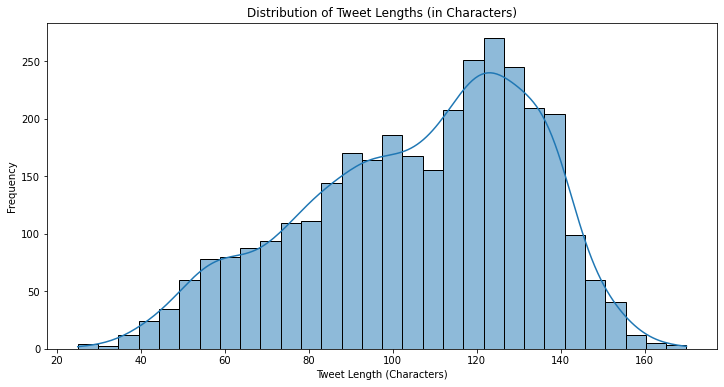

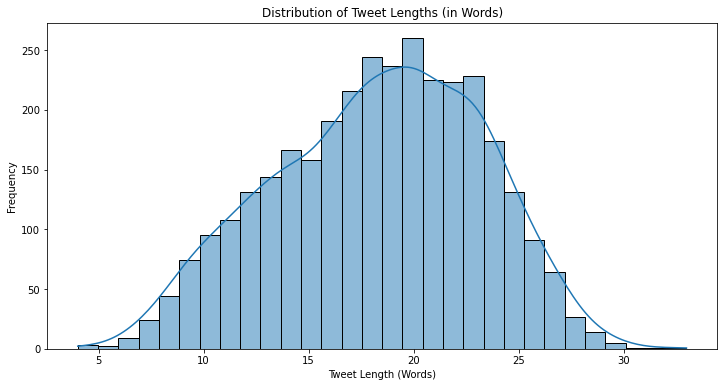

In [18]:
df['tweet_length'] = df['tweet_text'].str.len()  # Character count
df['tweet_length_words'] = df['tweet_text'].str.split().str.len()  # Word count

# Plotting the distribution of tweet lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths (in Characters)')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['tweet_length_words'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths (in Words)')
plt.xlabel('Tweet Length (Words)')
plt.ylabel('Frequency')
plt.show()

Step 3: Directed Brand/Product Analysis
We'll find out which products or brands are mentioned most frequently

Brand/Product Frequency Count:
ipad                               946
apple                              661
ipad or iphone app                 470
google                             430
iphone                             297
other google product or service    293
android app                         81
android                             78
other apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64


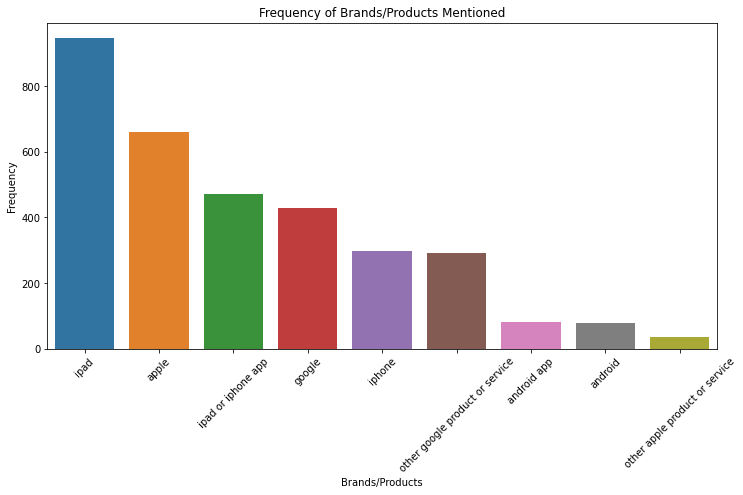

In [19]:
brand_counts = df['emotion_in_tweet_is_directed_at'].value_counts()
print("Brand/Product Frequency Count:")
print(brand_counts)

# Bar chart for brand mentions
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Frequency of Brands/Products Mentioned')
plt.xlabel('Brands/Products')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Step 4: Hashtags and Mentions Analysis
We'll extract hashtags and mentions and analyze their frequency.

In [20]:
# Extract hashtags and mentions
df['hashtags'] = df['tweet_text'].apply(lambda x: re.findall(r'#\w+', x))
df['mentions'] = df['tweet_text'].apply(lambda x: re.findall(r'@\w+', x))

# Flatten the lists and count frequency
all_hashtags = [item for sublist in df['hashtags'] for item in sublist]
all_mentions = [item for sublist in df['mentions'] for item in sublist]
hashtag_freq = Counter(all_hashtags)
mention_freq = Counter(all_mentions)

# Print the most common hashtags and mentions
print("Most common hashtags:", hashtag_freq.most_common(10))
print("Most common mentions:", mention_freq.most_common(10))

Most common hashtags: [('#sxsw', 1703), ('#SXSW', 1527), ('#Apple', 94), ('#apple', 83), ('#iPad', 81), ('#iPad2', 65), ('#SxSW', 61), ('#iPhone', 60), ('#sxswi', 59), ('#ipad2', 56)]
Most common mentions: [('@mention', 2272), ('@madebymany', 5), ('@mentionR', 2), ('@wesley83', 1), ('@jessedee', 1), ('@fludapp', 1), ('@swonderlin', 1), ('@sxsw', 1), ('@sxtxstate', 1), ('@thenextweb', 1)]


Step 5: Keyword Analysis
We'll check for the presence of specific positive or negative keywords and visualize their occurrences.

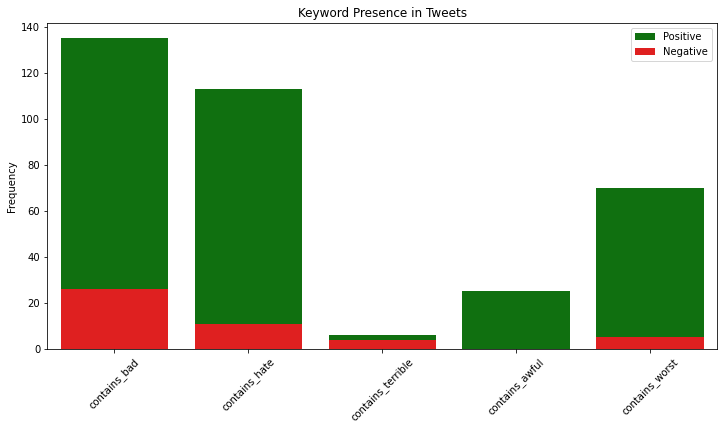

In [21]:
# Define keywords
positive_keywords = ['great', 'love', 'excellent', 'happy', 'best']
negative_keywords = ['bad', 'hate', 'terrible', 'awful', 'worst']

# Create binary features for keywords
for keyword in positive_keywords + negative_keywords:
    df[f'contains_{keyword}'] = df['tweet_text'].str.contains(keyword, case=False, na=False).astype(int)

# Count occurrences of keywords
positive_counts = df[[f'contains_{keyword}' for keyword in positive_keywords]].sum()
negative_counts = df[[f'contains_{keyword}' for keyword in negative_keywords]].sum()

# Visualization of keyword presence
plt.figure(figsize=(12, 6))
sns.barplot(x=positive_counts.index, y=positive_counts.values, color='green', label='Positive')
sns.barplot(x=negative_counts.index, y=negative_counts.values, color='red', label='Negative')
plt.title('Keyword Presence in Tweets')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Step : Correlation Analysis
We'll analyze the correlation between numeric features if applicable.

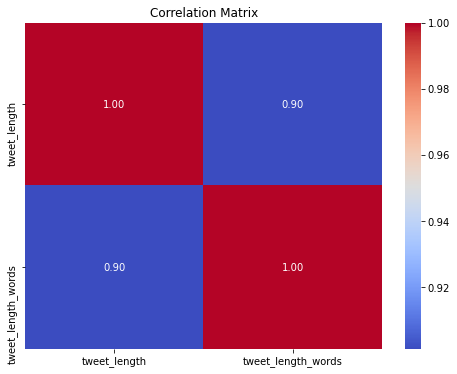

In [22]:

correlation_matrix = df[['tweet_length', 'tweet_length_words']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Step 7: Feature Engineering
We'll calculate features for tweet lengths, keyword presence, and engagement.



In [23]:

if 'retweets' in df.columns and 'likes' in df.columns:
    df['engagement'] = df['retweets'] + df['likes']
    print(df[['retweets', 'likes', 'engagement']].head(10))

# 5. Model preparation after EDA

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re

### Creating Target labels

In a machine learning context, the target label is typically the output variable (dependent variable) that the model is trained to predict. 

 In a sentiment analysis problem, the target variable might be the sentiment category (positive, negative, neutral) of a given text which in our dataset we have the column is_there_an_emotion_directed_at_a_brand_or_product, having these features, therefore this will be our target label. 

In [25]:
df['sentiment'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'positive emotion': 1,
    'negative emotion': -1,
    'no emotion toward brand or product': 0
})
print(df[['is_there_an_emotion_directed_at_a_brand_or_product', 'sentiment']].head(10))

   is_there_an_emotion_directed_at_a_brand_or_product  sentiment
0                                    negative emotion       -1.0
1                                    positive emotion        1.0
2                                    positive emotion        1.0
3                                    negative emotion       -1.0
4                                    positive emotion        1.0
7                                    positive emotion        1.0
8                                    positive emotion        1.0
9                                    positive emotion        1.0
10                                   positive emotion        1.0
11                                   positive emotion        1.0


In [26]:
print(df['sentiment'].value_counts())


 1.0    2672
-1.0     519
 0.0      91
Name: sentiment, dtype: int64


In [27]:
unique_labels = df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()
print(unique_labels)


['negative emotion' 'positive emotion'
 'no emotion toward brand or product' "i can't tell"]


### Distribution of target labels

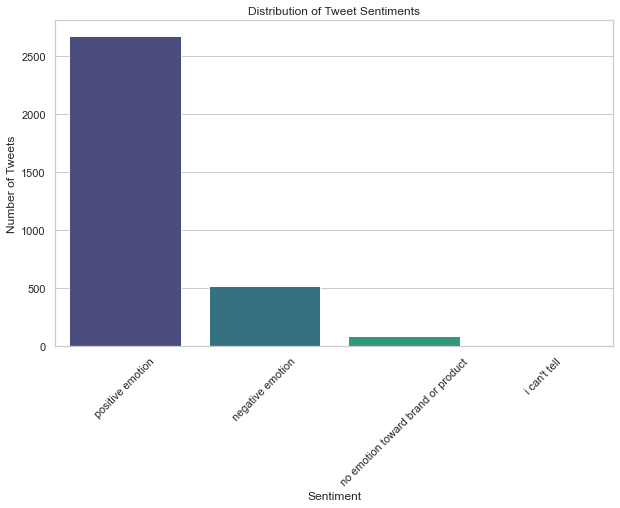

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# Count the occurrences of each sentiment label
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

# 6. Binary Classifier

### Filtering for Binary classification

Here we will filter to use only positive and negative emotions

In [29]:
df_binary = df[df['sentiment'].isin(['positive', 'negative'])]


## Text Preprocessing

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

Tokenization: Break the cleaned tweets into individual words.

Lowercasing: Convert all text to lowercase to ensure uniformity.

Removing Stopwords: Remove common words that may not contribute to sentiment (e.g., "and", "the", "is").

Stemming/Lemmatization: Normalize words to their base or root forms

In [31]:
# Download required NLTK resources 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    return text

df_binary['tweet_text'] = df_binary['tweet_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BENNLANGAT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BENNLANGAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BENNLANGAT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Train-test split

Divides data into training and testing sets to ensure the model can generalize to new data and prevents overfitting.

In [32]:
print(df['sentiment'].isna().sum())

9


In [33]:
df = df.dropna(subset=['sentiment'])


In [34]:
print(df['sentiment'].isna().sum())

0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df['tweet_text'], 
    df['sentiment'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['sentiment']
)


## Vectorization

 Converts text into numerical form, making it compatible with machine learning models, while also capturing the relationships and frequency of words in the text

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# 7.  Modeling

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Baseline model ( Logistic regression)

We will start by modeling a baseline model with Binary classifier.

In [38]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [39]:
y_pred = model.predict(X_test_tfidf)


In [40]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Extract and print Recall and F1 score for each class
positive_recall = report['positive']['recall']
negative_recall = report['negative']['recall']
positive_f1 = report['positive']['f1-score']
negative_f1 = report['negative']['f1-score']


# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)
print(f"Positive Recall: {positive_recall:.4f}")
print(f"Negative Recall: {negative_recall:.4f}")
print(f"Positive F1 Score: {positive_f1:.4f}")
print(f"Negative F1 Score: {negative_f1:.4f}")


Accuracy: 0.8447
Confusion Matrix:
[[ 21   0  83]
 [  2   0  16]
 [  1   0 534]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.20      0.33       104
         0.0       0.00      0.00      0.00        18
         1.0       0.84      1.00      0.91       535

    accuracy                           0.84       657
   macro avg       0.57      0.40      0.41       657
weighted avg       0.83      0.84      0.80       657



C:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: string indices must be integers

### Evaluating the Binary classifier model

In [41]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1 Score: 0.80

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.20      0.33       104
         0.0       0.00      0.00      0.00        18
         1.0       0.84      1.00      0.91       535

    accuracy                           0.84       657
   macro avg       0.57      0.40      0.41       657
weighted avg       0.83      0.84      0.80       657



### Applying SMOTE 

This would help in dealing with class imabalance

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [43]:
from imblearn.over_sampling import SMOTE

# Assuming your training data is X_train_tfidf and y_train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Now X_train_smote and y_train_smote can be used to train your multiclass model


# 8. MultiClass Classifier

The main purpose of a multiclass classifier is to extend the classification task beyond two categories, allowing models to effectively distinguish between multiple distinct classes. This is crucial for many real-world applications where multiple options exist, and it helps provide a deeper understanding of the underlying data.

We will build a multiclass using logistic modelto include neutral tweets on our binary classifier

In [44]:
# Logistic Regression for Multiclass Classification
from sklearn.linear_model import LogisticRegression

# Train a multiclass logistic regression model
multi_class_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_class_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_multiclass = multi_class_model.predict(X_test_tfidf)

# Evaluate the multiclass model
accuracy_multiclass = accuracy_score(y_test, y_pred_multiclass)
conf_matrix_multiclass = confusion_matrix(y_test, y_pred_multiclass)
report_multiclass = classification_report(y_test, y_pred_multiclass, output_dict=True)

# Print evaluation metrics
print(f'Multiclass Accuracy: {accuracy_multiclass:.4f}')
print('Multiclass Confusion Matrix:')
print(conf_matrix_multiclass)
print('Multiclass Classification Report:')
print(report_multiclass)


Multiclass Accuracy: 0.7869
Multiclass Confusion Matrix:
[[ 50   6  48]
 [  5   1  12]
 [ 50  19 466]]
Multiclass Classification Report:
{'-1.0': {'precision': 0.47619047619047616, 'recall': 0.4807692307692308, 'f1-score': 0.4784688995215311, 'support': 104}, '0.0': {'precision': 0.038461538461538464, 'recall': 0.05555555555555555, 'f1-score': 0.04545454545454546, 'support': 18}, '1.0': {'precision': 0.8859315589353612, 'recall': 0.8710280373831776, 'f1-score': 0.8784165881244109, 'support': 535}, 'accuracy': 0.786910197869102, 'macro avg': {'precision': 0.466861191195792, 'recall': 0.46911760790265467, 'f1-score': 0.46744667770016246, 'support': 657}, 'weighted avg': {'precision': 0.7978531221408456, 'recall': 0.786910197869102, 'f1-score': 0.7922858782572008, 'support': 657}}


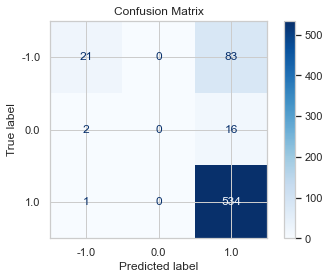

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create and display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [46]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores and the average
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.84       0.83619048 0.83238095 0.82285714 0.82857143]
Mean Accuracy: 0.8320


# 9. Advanced models

Advanced models are used to improve prediction accuracy, handle complexity, reduce overfitting, and automatically discover feature interactions. They provide greater flexibility and adaptability, allowing to fit data more effectively compared to simpler models. Additionally, they give  a competitive edge and offer better generalization to new, unseen data.


In [47]:
df['tweet_text'] = df['tweet_text'].fillna('')

# Fit and transform the cleaned tweet text
X_tfidf = tfidf_vectorizer.fit_transform(df['tweet_text']).toarray()


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  

# Fit and transform the cleaned tweet text
X_tfidf = tfidf_vectorizer.fit_transform(df['tweet_text']).toarray()

# Display the shape of the TF-IDF matrix
print(f'TF-IDF Feature Matrix Shape: {X_tfidf.shape}')


TF-IDF Feature Matrix Shape: (3282, 5000)


##  RANDOM FOREST


Random Forest is often chosen due to its high accuracy, reduced risk of overfitting, ability to handle high-dimensional data and missing values, robustness to noise, and good interpretability through feature importance. It provides a stable, versatile, and powerful ensemble method that works well out-of-the-box, making it an excellent choice 


In [49]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a basic Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate Random Forest model
print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Tuning Random Forest model using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_smote, y_train_smote)

# Best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_tfidf)

# Evaluate tuned Random Forest model
print("Tuned Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Random Forest Classifier Evaluation:
Accuracy: 0.8508
Confusion Matrix:
[[ 29   2  73]
 [  0   1  17]
 [  5   1 529]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.28      0.42       104
         0.0       0.25      0.06      0.09        18
         1.0       0.85      0.99      0.92       535

    accuracy                           0.85       657
   macro avg       0.65      0.44      0.48       657
weighted avg       0.84      0.85      0.82       657

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.0min finished


Tuned Random Forest Classifier Evaluation:
Accuracy: 0.8524
Confusion Matrix:
[[ 30   2  72]
 [  0   1  17]
 [  5   1 529]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.29      0.43       104
         0.0       0.25      0.06      0.09        18
         1.0       0.86      0.99      0.92       535

    accuracy                           0.85       657
   macro avg       0.65      0.44      0.48       657
weighted avg       0.84      0.85      0.82       657



# 10. Advanced model after Tuning

## Neural Network( MLPClassifier)

The MLPClassifier is well-suited for our sentiment analysis problem due to its ability to model complex relationships, handle multiclass classifications, learn features automatically, and generalize effectively. Given the nature of sentiment data, where nuances and context are crucial, the advantages of using an MLP could lead to significant improvements in our model's performance and accuracy.

In [50]:
# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train_smote, y_train_smote)

# Predictions using Neural Network
y_pred_nn = nn_model.predict(X_test_tfidf)

# Evaluate Neural Network model
print("Neural Network Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

Neural Network Classifier Evaluation:
Accuracy: 0.8234
Confusion Matrix:
[[ 43   6  55]
 [  3   1  14]
 [ 28  10 497]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.58      0.41      0.48       104
         0.0       0.06      0.06      0.06        18
         1.0       0.88      0.93      0.90       535

    accuracy                           0.82       657
   macro avg       0.51      0.47      0.48       657
weighted avg       0.81      0.82      0.81       657



Comparing Untuned and Tuned Random Forest with Neural Netrwork.

In [51]:
# Compare the advanced  models
print("Model Comparison Summary:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")

Model Comparison Summary:
Random Forest Accuracy: 0.8508
Tuned Random Forest Accuracy: 0.8524
Neural Network Accuracy: 0.8234


# 11. Visual comparison of the above prepared  models using matplotlib




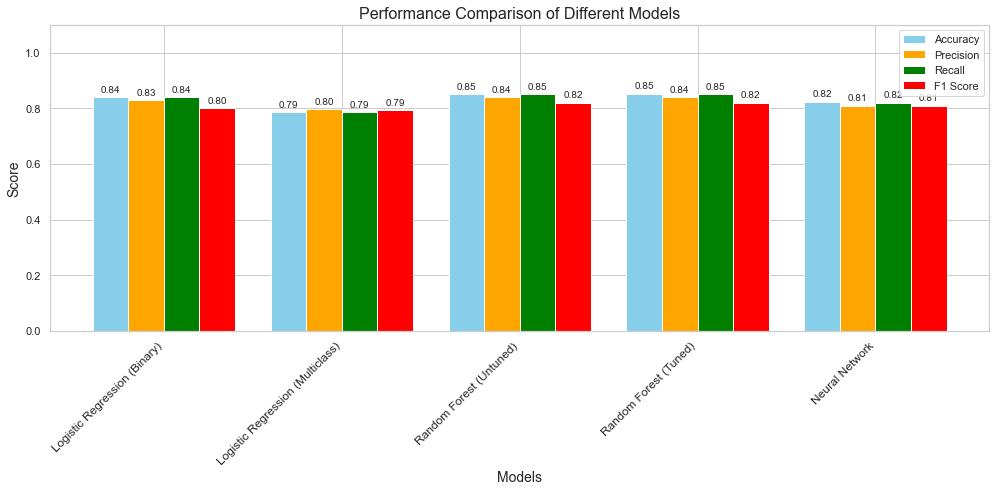

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
metrics = {
    'Logistic Regression (Binary)': {'accuracy': 0.84, 'precision': 0.83, 'recall': 0.84, 'f1-score': 0.80},
    'Logistic Regression (Multiclass)': {'accuracy': 0.7869, 'precision': 0.7979, 'recall': 0.7869, 'f1-score': 0.7923},
    'Random Forest (Untuned)': {'accuracy': 0.8508, 'precision': 0.84, 'recall': 0.85, 'f1-score': 0.82},
    'Random Forest (Tuned)': {'accuracy': 0.8524, 'precision': 0.84, 'recall': 0.85, 'f1-score': 0.82},
    'Neural Network': {'accuracy': 0.8234, 'precision': 0.81, 'recall': 0.82, 'f1-score': 0.81}
}

# Extracting the data to plot
model_names = list(metrics.keys())
accuracy = [metrics[model]['accuracy'] for model in model_names]
precision = [metrics[model]['precision'] for model in model_names]
recall = [metrics[model]['recall'] for model in model_names]
f1_score = [metrics[model]['f1-score'] for model in model_names]

# Creating the bar chart for each metric
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='orange')
bars3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='green')
bars4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='red')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Performance Comparison of Different Models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=12)
ax.set_ylim([0, 1.1])
ax.legend()

# Adding values on top of each bar
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
